## Main Library

In [1]:
# Reading Data
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Building model
from sklearn.utils import shuffle
from keras.utils import np_utils
import tensorflow as tf
import tensorflow.keras as k
from sklearn.model_selection import train_test_split

import pickle

# Reading Data

In [2]:
path_image = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Human Emotion Detection from Images\CK+48"

data_list = os.listdir(path_image)

img_data = []
for data_set in data_list:
    img_list = os.listdir(path_image+"/"+data_set)
    print("Loading image -{}" .format(data_set))
    for image in img_list:
        input_img = cv2.imread(path_image+"/"+ data_set +"/"+ image)
        input_img_new = cv2.resize(input_img, (100, 100))

#         input_img_new = cv2.resize(input_img, (800, 800))
        img_data.append(input_img_new)

Loading image -anger
Loading image -contempt
Loading image -disgust
Loading image -fear
Loading image -happy
Loading image -sadness
Loading image -surprise


In [3]:
data = np.array(img_data)
data = data.astype("float32")
data_scaled = data/255.0

print(data.shape)

(981, 100, 100, 3)


In [4]:
data[0]

array([[[ 24.,  24.,  24.],
        [ 21.,  21.,  21.],
        [ 14.,  14.,  14.],
        ...,
        [188., 188., 188.],
        [229., 229., 229.],
        [248., 248., 248.]],

       [[ 22.,  22.,  22.],
        [ 20.,  20.,  20.],
        [ 14.,  14.,  14.],
        ...,
        [178., 178., 178.],
        [224., 224., 224.],
        [245., 245., 245.]],

       [[ 19.,  19.,  19.],
        [ 17.,  17.,  17.],
        [ 12.,  12.,  12.],
        ...,
        [155., 155., 155.],
        [212., 212., 212.],
        [239., 239., 239.]],

       ...,

       [[230., 230., 230.],
        [230., 230., 230.],
        [230., 230., 230.],
        ...,
        [155., 155., 155.],
        [157., 157., 157.],
        [157., 157., 157.]],

       [[232., 232., 232.],
        [233., 233., 233.],
        [233., 233., 233.],
        ...,
        [154., 154., 154.],
        [156., 156., 156.],
        [156., 156., 156.]],

       [[234., 234., 234.],
        [234., 234., 234.],
        [234., 2

In [5]:
data_scaled[0]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.08235294, 0.08235294, 0.08235294],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.7372549 , 0.7372549 , 0.7372549 ],
        [0.8980392 , 0.8980392 , 0.8980392 ],
        [0.972549  , 0.972549  , 0.972549  ]],

       [[0.08627451, 0.08627451, 0.08627451],
        [0.07843138, 0.07843138, 0.07843138],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.69803923, 0.69803923, 0.69803923],
        [0.8784314 , 0.8784314 , 0.8784314 ],
        [0.9607843 , 0.9607843 , 0.9607843 ]],

       [[0.07450981, 0.07450981, 0.07450981],
        [0.06666667, 0.06666667, 0.06666667],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.60784316, 0.60784316, 0.60784316],
        [0.83137256, 0.83137256, 0.83137256],
        [0.9372549 , 0.9372549 , 0.9372549 ]],

       ...,

       [[0.9019608 , 0.9019608 , 0.9019608 ],
        [0.9019608 , 0.9019608 , 0.9019608 ],
        [0.9019608 , 0

## Prepare Data

In [6]:
num_class = len(data_list)
num_sample = data.shape[0]

label = np.ones((num_sample,), dtype="int64")

label[0:134] = 0 # ==> Anger
label[135:188] = 1  # ==> contempt
label[189:365] = 2  # ==> disgunt
label[366:440] = 3  # ==> fear
label[441:647] = 4  # ==> happy
label[648:731] = 5  # ==> sadness
label[732:980] = 6  # ==> surprise

names = data_list
image_label =  np_utils.to_categorical(label, num_class)

In [7]:
x_img, y_img = shuffle(data_scaled, image_label, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8, random_state=42)

In [8]:
x_train.shape,y_train.shape

((784, 100, 100, 3), (784, 7))

## show some sample of data

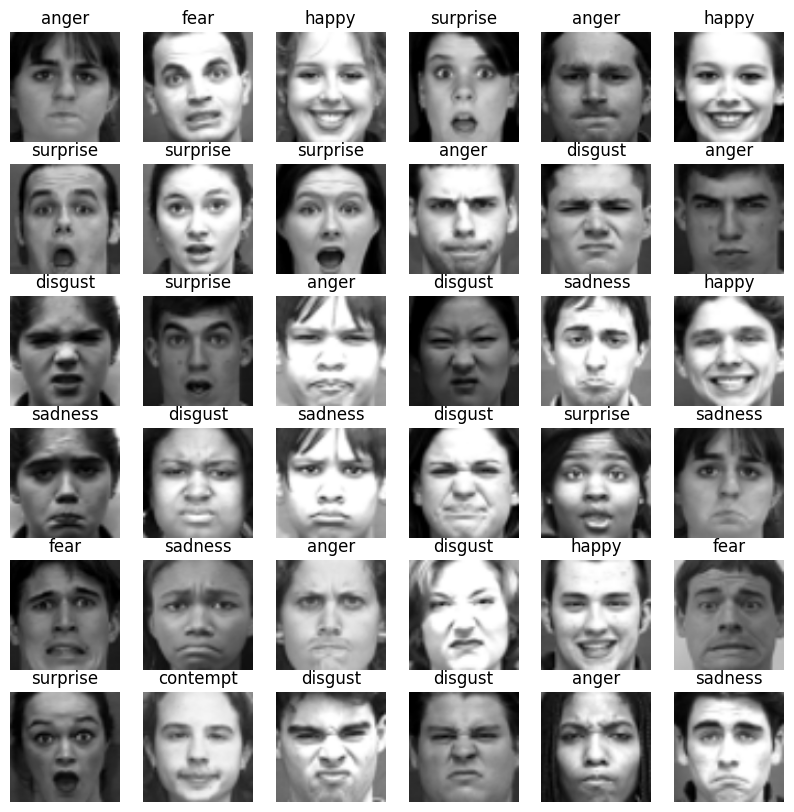

In [9]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(x_img), 36))):
    plt.subplot(6, 6, i+1)
    plt.imshow(x_img[j])
    plt.axis("off")
    plt.title(names[list(y_img[j].astype(int)).index(1)])

## Building Model ==> Tensorflow, keras

In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Activation

In [19]:
model_CNN = k.models.Sequential()

model_CNN.add(Conv2D(6, (5, 5), input_shape=(100, 100 ,3), padding="same", activation="relu"))
model_CNN.add(MaxPooling2D((2, 2)))

model_CNN.add(Conv2D(32, (5, 5), padding="valid", activation="relu"))
model_CNN.add(Activation("relu"))
model_CNN.add(MaxPooling2D((2, 2)))

model_CNN.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model_CNN.add(MaxPooling2D((2, 2)))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation="relu"))
model_CNN.add(Dropout(0.5))

model_CNN.add(Dense(32, activation="relu"))
model_CNN.add(Dropout(0.3))

model_CNN.add(Dense(7, activation="softmax"))

model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 6)       456       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 50, 50, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        4832      
                                                                 
 activation_3 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 23, 23, 128)      

In [20]:
model_CNN.compile(optimizer="adam", 
                  loss=k.losses.CategoricalCrossentropy(), 
                 metrics=["accuracy"])

In [21]:
history = model_CNN.fit(x_train, y_train, epochs=100, validation_split=0.4, validation_data=(x_test, y_test), validation_steps=1)

Epoch 1/100
25/25 [==============================] - 6s 140ms/step - loss: 1.9501 - accuracy: 0.1901 - val_loss: 1.7999 - val_accuracy: 0.2792
Epoch 2/100
25/25 [==============================] - 3s 123ms/step - loss: 1.8286 - accuracy: 0.2883 - val_loss: 1.6479 - val_accuracy: 0.4873
Epoch 3/100
25/25 [==============================] - 3s 119ms/step - loss: 1.5679 - accuracy: 0.4401 - val_loss: 1.1125 - val_accuracy: 0.6447
Epoch 4/100
25/25 [==============================] - 3s 116ms/step - loss: 1.1339 - accuracy: 0.5829 - val_loss: 0.8049 - val_accuracy: 0.7310
Epoch 5/100
25/25 [==============================] - 3s 116ms/step - loss: 0.9838 - accuracy: 0.6339 - val_loss: 0.7857 - val_accuracy: 0.7766
Epoch 6/100
25/25 [==============================] - 3s 117ms/step - loss: 0.8548 - accuracy: 0.6862 - val_loss: 0.6830 - val_accuracy: 0.7919
Epoch 7/100
25/25 [==============================] - 3s 119ms/step - loss: 0.7625 - accuracy: 0.7054 - val_loss: 0.6138 - val_accuracy: 0.8223

Epoch 58/100
25/25 [==============================] - 3s 121ms/step - loss: 0.1288 - accuracy: 0.9630 - val_loss: 0.3042 - val_accuracy: 0.9848
Epoch 59/100
25/25 [==============================] - 3s 120ms/step - loss: 0.1057 - accuracy: 0.9617 - val_loss: 0.3274 - val_accuracy: 0.9695
Epoch 60/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1413 - accuracy: 0.9566 - val_loss: 0.2875 - val_accuracy: 0.9848
Epoch 61/100
25/25 [==============================] - 3s 122ms/step - loss: 0.1338 - accuracy: 0.9566 - val_loss: 0.3356 - val_accuracy: 0.9645
Epoch 62/100
25/25 [==============================] - 3s 119ms/step - loss: 0.1203 - accuracy: 0.9566 - val_loss: 0.3398 - val_accuracy: 0.9695
Epoch 63/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1373 - accuracy: 0.9464 - val_loss: 0.3078 - val_accuracy: 0.9594
Epoch 64/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1318 - accuracy: 0.9503 - val_loss: 0.3582 - val_accuracy:

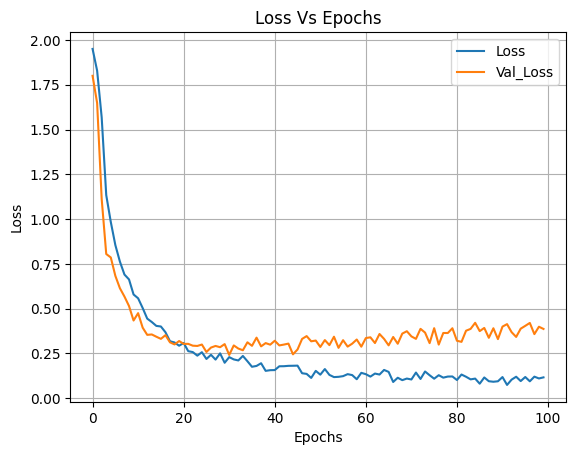

In [22]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

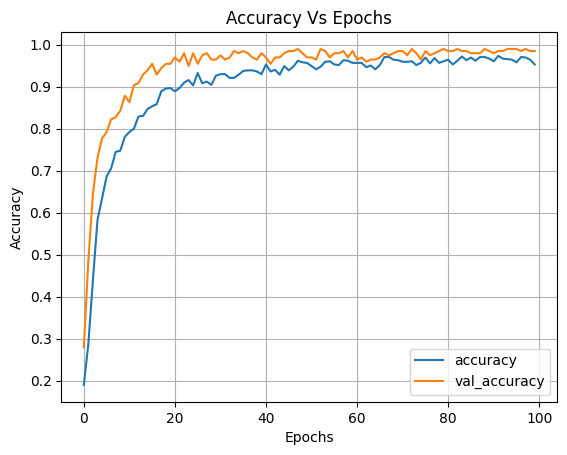

In [23]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [24]:
loss, accuracy = model_CNN.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {round(accuracy, 3)} %")
print(f"The loss Testing Data is ==> {round(loss, 3)}")

7/7 [==============================] - 1s 36ms/step - loss: 0.3865 - accuracy: 0.9848
The Accuracy Testing Data is ==> 0.985 %
The loss Testing Data is ==> 0.386


## ===========================================================
## ===========================================================
## ===========================================================

In [25]:
pickle.dump(model_CNN, open(r"D:\Pycharm\model_pickle\human_emotion.bin", "wb"))

# model = pickle.load(open(r"D:\Pycharm\model_pickle\human_emotion.bin", "rb"))

## System prediction

Please Enter The Path of Image: D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\Human Emotion Detection from Images\CK+48\happy\S061_002_00000013.png




1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 1. 0. 0.]]
The Number Prediction is ==>  happy


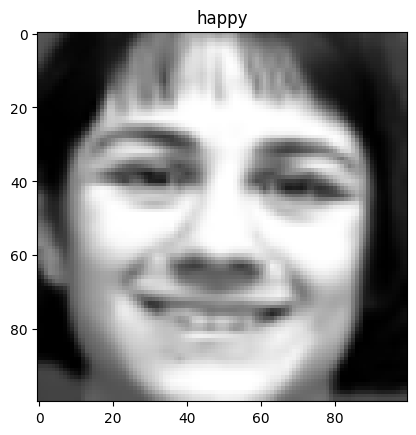

In [34]:
path_image = input("Please Enter The Path of Image: ")

image = cv2.imread(path_image)

image = cv2.resize(image, (100, 100))
# image = cv2.resize(image, (800, 600))


new_image = np.reshape(image, [1, 100, 100, 3])

print("\n\n\n")

new_predict = model_CNN.predict(new_image)
print(new_predict)

print(f"The Number Prediction is ==>  {names[new_predict.argmax()]}" )

plt.imshow(image, cmap="gray")
plt.title(names[new_predict.argmax()])
plt.show()

# Computer Vision To Show Real Time

In [24]:
camera = cv2.VideoCapture(0)

face_detect = cv2.CascadeClassifier(r"D:\Pycharm\Computer Vision\haar cascade files-20230720T005324Z-001\haarcascade_frontalface_default.xml")


while True:
    _, images = camera.read()
    
    face = face_detect.detectMultiScale(images)
    
    for (x, y, w, h) in face:
        cv2.rectangle(images, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
        face_pre = images[y:y+h, x:x+w]
        
        images_a = cv2.resize(face_pre, (100, 100))
        new_image = np.reshape(images_a, [1, 100, 100, 3])
        new_predict = model_CNN.predict(new_image)

        print(names[new_predict.argmax()])
         
#       cv2.putText(new_image, names[new_predict.argmax()], 1, 1, (0, 255, 0), 1)
        
        
    cv2.imshow("image", images)
    if cv2.waitKey(60) & 0xff == ord("o"):
        break

1/1 [==============================] - 0s 26ms/step
disgust
1/1 [==============================] - 0s 33ms/step
anger
1/1 [==============================] - 0s 26ms/step
anger
1/1 [==============================] - 0s 27ms/step
contempt
1/1 [==============================] - 0s 34ms/step
disgust
1/1 [==============================] - 0s 25ms/step
anger
1/1 [==============================] - 0s 26ms/step
anger
1/1 [==============================] - 0s 24ms/step
surprise
1/1 [==============================] - 0s 23ms/step
anger
1/1 [==============================] - 0s 25ms/step
anger
1/1 [==============================] - 0s 26ms/step
anger
1/1 [==============================] - 0s 25ms/step
contempt
1/1 [==============================] - 0s 25ms/step
disgust
1/1 [==============================] - 0s 24ms/step
disgust
1/1 [==============================] - 0s 27ms/step
disgust
1/1 [==============================] - 0s 26ms/step
disgust
1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 27ms/step
surprise
1/1 [==============================] - 0s 26ms/step
disgust
1/1 [==============================] - 0s 24ms/step
disgust
1/1 [==============================] - 0s 28ms/step
surprise
1/1 [==============================] - 0s 25ms/step
surprise
1/1 [==============================] - 0s 25ms/step
disgust
1/1 [==============================] - 0s 28ms/step
disgust
1/1 [==============================] - 0s 28ms/step
disgust
1/1 [==============================] - 0s 24ms/step
sadness
1/1 [==============================] - 0s 25ms/step
disgust
1/1 [==============================] - 0s 24ms/step
disgust
1/1 [==============================] - 0s 25ms/step
disgust
1/1 [==============================] - 0s 26ms/step
sadness
1/1 [==============================] - 0s 25ms/step
anger
1/1 [==============================] - 0s 25ms/step
disgust
1/1 [==============================] - 0s 24ms/step
anger


In [25]:
names

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']